# Setting up pyDOE and First Steps

The purpose of this notebook is to capture details of how to set up pyDOE and the first steps in using it.

To install pyDOE issue the folowing command (note we are using pyDOE2 as this is needed with later versions of python)

```python 
pip install --upgrade pyDOE2 
```

## The Problem
In order to demonstarte pyDOE we need a problem to solve and in this case we are going to attempt to answer a question related to a jet engine model. That question is simply, what set of test shold we run to generate a full spectrum of results for an jet engine model?

### Inputs
To answer this question we need to understand what the inputs to the model will be. To do this a simple input/output diagram (or meta-model) shuld be drawn. 

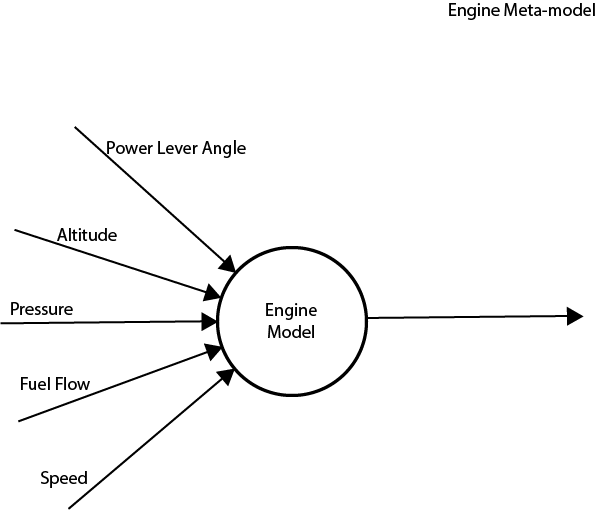

For the purpose of this exercise we are going only to concern ourselves with, power lever angle (trottle), speed, temperature, fuel flow and pressure. All variable are continuous variables that are assumed to remain the same throughout the simulation. 

The first thing to do is to work out what the minimum and maximum values are for our parameters.Since this is not an actual engine and we are not going to be creating a model, we can just make some up.

Power Lever Angle: 15-120,
Altitude: 0 - 50000,
Pressure: 0-50,
Fuel Flow: 0-100,
Speed: 0-2.5

So lets code thse into a dataframe.


In [5]:
import pandas as pd
params = {'PLA': [15,120], 'Alt': [0.,15000.], 'Pressure': [0.,50.], 'Fuel': [0.,100.], 'Speed': [0.,2.5]}
params_df = pd.DataFrame(data=params)
params_df

,PLA,Alt,Pressure,Fuel,Speed
0,15,0.0,0.0,0.0,0.0
1,120,15000.0,50.0,100.0,2.5


OK, lets import pydoe (note we're using version 2 as it is compatible with python 3.6+).

In [2]:
from pyDOE2 import *

Our DoE expert has advised us to go for a full factor analysis at 3 levels on each parameter.

In [31]:
tests = fullfact([3, 3, 3, 3, 3])
tests = pd.DataFrame(tests, columns = ['PLA','Alt','Pressure','Fuel','Speed'])
tests

,PLA,Alt,Pressure,Fuel,Speed
0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
238,1.0,1.0,2.0,2.0,2.0
239,2.0,1.0,2.0,2.0,2.0
240,0.0,2.0,2.0,2.0,2.0
241,1.0,2.0,2.0,2.0,2.0


We need to convert the levels for each parameter to something meaningful.

In [32]:

for i, f in tests.iterrows():
    if (f[0] == 0.):
        f[0] = params_df.iat[0,0]
    elif (f[0] == 2.):
        f[0] = params_df.iat[1,0]
    else:
        f[0] = ((params_df.iat[1,0] - params_df.iat[0,0])/2.)+params_df.iat[0,0]
        
    if (f[1] == 0.):
        f[1] = params_df.iat[0,1]
    elif (f[1] == 2.):
        f[1] = params_df.iat[1,1]
    else:
        f[1] = ((params_df.iat[1,1] - params_df.iat[0,1])/2.)+params_df.iat[0,1]
        
    if (f[2] == 0.):
        f[2] = params_df.iat[0,2]
    elif (f[2] == 2.):
        f[2] = params_df.iat[1,2]
    else:
        f[2] = ((params_df.iat[1,2] - params_df.iat[0,2])/2.)+params_df.iat[0,2]
        
    if (f[3] == 0.):
        f[3] = params_df.iat[0,3]
    elif (f[3] == 2.):
        f[3] = params_df.iat[1,3]
    else:
        f[3] = ((params_df.iat[1,3] - params_df.iat[0,3])/2.)+params_df.iat[0,3]
        
    if (f[4] == 0.):
        f[4] = params_df.iat[0,4]
    elif (f[4] == 2.):
        f[4] = params_df.iat[1,4]
    else:
        f[4] = ((params_df.iat[1,4] - params_df.iat[0,4])/2.)+params_df.iat[0,4]
        
    
tests

,PLA,Alt,Pressure,Fuel,Speed
0,15.0,0.0,0.0,0.0,0.0
1,67.5,0.0,0.0,0.0,0.0
2,120.0,0.0,0.0,0.0,0.0
3,15.0,7500.0,0.0,0.0,0.0
4,67.5,7500.0,0.0,0.0,0.0
...,...,...,...,...,...
238,67.5,7500.0,50.0,100.0,2.5
239,120.0,7500.0,50.0,100.0,2.5
240,15.0,15000.0,50.0,100.0,2.5
241,67.5,15000.0,50.0,100.0,2.5


Just need to save the dataframe as a csv that we can load as test points in our simulations.

In [34]:
tests.to_csv('EngineModelTestPoints.csv')